In [3]:
import numpy as np
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy
%matplotlib inline

In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [54]:
class_columns = ['BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',\
                 'Heating', 'CentralAir', 'Electrical', 'GarageType'] 

In [24]:
train_cat = train.select_dtypes(include = 'object')

In [25]:
train_num = train.select_dtypes(exclude = 'object')

In [28]:
train_num.shape

(1460, 38)

In [29]:
train_cat.shape

(1460, 43)

In [36]:
train_num.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


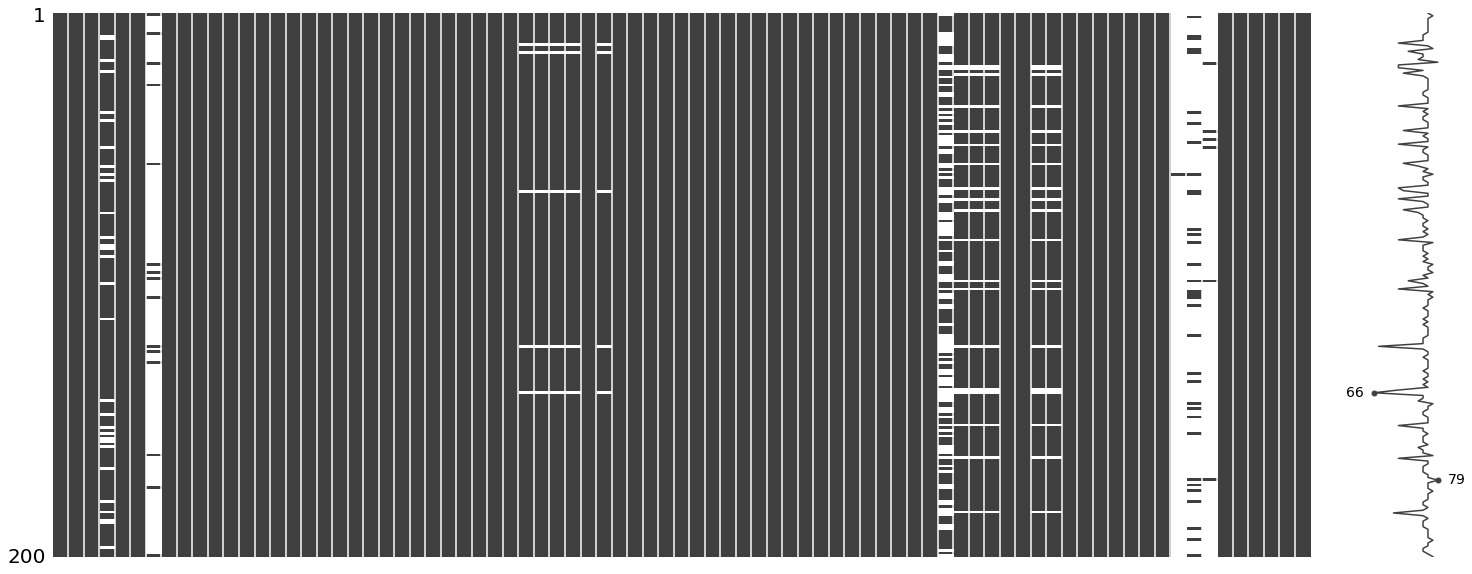

In [39]:
msno.matrix(train.sample(200))

In [40]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

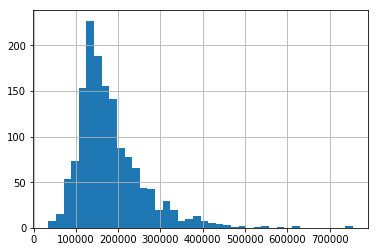

In [46]:
train.SalePrice.hist(bins = 40)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


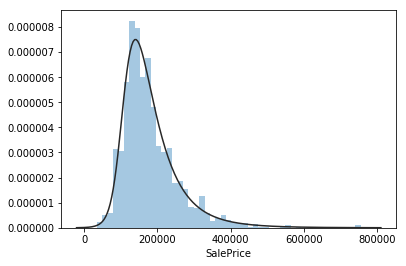

In [51]:
y = train['SalePrice']
sns.distplot(y, kde = False, fit = scipy.stats.johnsonsu)

In [52]:
train_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [55]:
train[class_columns].head()

,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType
0,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd
1,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Attchd
2,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd
3,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Detchd
4,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Attchd


In [70]:
#tmodel = cluster.KMeans()
tmodel.fit?

In [72]:
train[class_columns]['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [74]:
build_type = train[class_columns]
build_type.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [75]:
build_type.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [146]:
def chi2dependence(x_vec, y_vec):
    rowindex = x_vec.unique()
    colindex = y_vec.unique()
    cor_matrix = np.zeros(len(rowindex)*len(colindex)).reshape(len(rowindex), len(colindex))
    cor_matrix = pd.DataFrame(cor_matrix, index = rowindex, columns = colindex)
    for i in range(0, len(x_vec)):
        cor_matrix.loc[x_vec[i], y_vec[i]] += 1
    return cor_matrix
    

In [82]:
a = [[1,2,3],[2,3,4],[3,4,5]]
b = np.matrix(a)

In [130]:
mat1.columns

Index(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'],
      dtype='object')

In [120]:
mat1 = chi2dependence(build_type.BldgType, build_type.HouseStyle)
mat1

,2Story,1Story,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin
1Fam,362.0,607.0,142.0,13.0,20.0,60.0,9.0,7.0
2fmCon,11.0,7.0,8.0,1.0,0.0,1.0,2.0,1.0
Duplex,9.0,29.0,4.0,0.0,9.0,1.0,0.0,0.0
TwnhsE,30.0,78.0,0.0,0.0,4.0,2.0,0.0,0.0
Twnhs,33.0,5.0,0.0,0.0,4.0,1.0,0.0,0.0


In [126]:
print(mat1.sum(1))
print('\n')
print(mat1.sum(0))

1Fam      1220.0
2fmCon      31.0
Duplex      52.0
TwnhsE     114.0
Twnhs       43.0
dtype: float64


2Story    445.0
1Story    726.0
1.5Fin    154.0
1.5Unf     14.0
SFoyer     37.0
SLvl       65.0
2.5Unf     11.0
2.5Fin      8.0
dtype: float64


In [147]:
def chi2independent(matrix):
    numrow = matrix.shape[0]
    numcol = matrix.shape[1]
    cor_matrix = pd.DataFrame(np.zeros(numrow * numcol).reshape(numrow, numcol), index = matrix.index, columns = matrix.columns)
    for i in range(0, numrow):
        for j in range(0, numcol):
            cor_matrix.iloc[i,j] = matrix.sum(1)[i] * matrix.sum(0)[j] / matrix.sum().sum()
    return cor_matrix
            

In [133]:
mat1indy = chi2independent(mat1)
mat1indy

,2Story,1Story,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin
1Fam,371.849315,606.657534,128.684932,11.698630,30.917808,54.315068,9.191781,6.684932
2fmCon,9.448630,15.415068,3.269863,0.297260,0.785616,1.380137,0.233562,0.169863
Duplex,15.849315,25.857534,5.484932,0.498630,1.317808,2.315068,0.391781,0.284932
TwnhsE,34.746575,56.687671,12.024658,1.093151,2.889041,5.075342,0.858904,0.624658
Twnhs,13.106164,21.382192,4.535616,0.412329,1.089726,1.914384,0.323973,0.235616


In [134]:
mat2 = chi2dependence(build_type.Exterior1st, build_type.Exterior2nd)
mat2indy = chi2independent(mat2)

In [135]:
mat2

,VinylSd,MetalSd,Wd Shng,HdBoard,Plywood,Wd Sdng,CmentBd,BrkFace,Stucco,AsbShng,Brk Cmn,ImStucc,AsphShn,Stone,Other,CBlock
VinylSd,502.0,0.0,5.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
MetalSd,0.0,212.0,1.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Wd Sdng,2.0,1.0,9.0,2.0,8.0,177.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0
HdBoard,0.0,1.0,1.0,193.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
BrkFace,0.0,0.0,1.0,3.0,6.0,12.0,0.0,24.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
WdShing,0.0,0.0,17.0,2.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CemntBd,0.0,0.0,1.0,0.0,0.0,1.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Plywood,0.0,0.0,0.0,2.0,96.0,2.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0
AsbShng,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
Stucco,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [136]:
mat2indy

,VinylSd,MetalSd,Wd Shng,HdBoard,Plywood,Wd Sdng,CmentBd,BrkFace,Stucco,AsbShng,Brk Cmn,ImStucc,AsphShn,Stone,Other,CBlock
VinylSd,177.780822,75.486301,13.404110,73.017123,50.089041,69.489726,21.164384,8.818493,9.171233,7.054795,2.469178,3.527397,1.058219,1.763699,0.352740,0.352740
MetalSd,75.945205,32.246575,5.726027,31.191781,21.397260,29.684932,9.041096,3.767123,3.917808,3.013699,1.054795,1.506849,0.452055,0.753425,0.150685,0.150685
Wd Sdng,71.112329,30.194521,5.361644,29.206849,20.035616,27.795890,8.465753,3.527397,3.668493,2.821918,0.987671,1.410959,0.423288,0.705479,0.141096,0.141096
HdBoard,76.635616,32.539726,5.778082,31.475342,21.591781,29.954795,9.123288,3.801370,3.953425,3.041096,1.064384,1.520548,0.456164,0.760274,0.152055,0.152055
BrkFace,17.260274,7.328767,1.301370,7.089041,4.863014,6.746575,2.054795,0.856164,0.890411,0.684932,0.239726,0.342466,0.102740,0.171233,0.034247,0.034247
WdShing,8.975342,3.810959,0.676712,3.686301,2.528767,3.508219,1.068493,0.445205,0.463014,0.356164,0.124658,0.178082,0.053425,0.089041,0.017808,0.017808
CemntBd,21.057534,8.941096,1.587671,8.648630,5.932877,8.230822,2.506849,1.044521,1.086301,0.835616,0.292466,0.417808,0.125342,0.208904,0.041781,0.041781
Plywood,37.282192,15.830137,2.810959,15.312329,10.504110,14.572603,4.438356,1.849315,1.923288,1.479452,0.517808,0.739726,0.221918,0.369863,0.073973,0.073973
AsbShng,6.904110,2.931507,0.520548,2.835616,1.945205,2.698630,0.821918,0.342466,0.356164,0.273973,0.095890,0.136986,0.041096,0.068493,0.013699,0.013699
Stucco,8.630137,3.664384,0.650685,3.544521,2.431507,3.373288,1.027397,0.428082,0.445205,0.342466,0.119863,0.171233,0.051370,0.085616,0.017123,0.017123


In [137]:
mat2 - mat2indy

,VinylSd,MetalSd,Wd Shng,HdBoard,Plywood,Wd Sdng,CmentBd,BrkFace,Stucco,AsbShng,Brk Cmn,ImStucc,AsphShn,Stone,Other,CBlock
VinylSd,324.219178,-75.486301,-8.404110,-72.017123,-48.089041,-68.489726,-21.164384,-8.818493,-8.171233,-6.054795,-2.469178,-2.527397,-1.058219,-1.763699,0.647260,-0.352740
MetalSd,-75.945205,179.753425,-4.726027,-28.191781,-21.397260,-27.684932,-9.041096,-3.767123,-2.917808,-3.013699,-1.054795,-1.506849,0.547945,-0.753425,-0.150685,-0.150685
Wd Sdng,-69.112329,-29.194521,3.638356,-27.206849,-12.035616,149.204110,-8.465753,-2.527397,-2.668493,-1.821918,-0.987671,1.589041,-0.423288,0.294521,-0.141096,-0.141096
HdBoard,-76.635616,-31.539726,-4.778082,161.524658,1.408219,-28.954795,-9.123288,-3.801370,-3.953425,-3.041096,-1.064384,0.479452,0.543836,-0.760274,-0.152055,-0.152055
BrkFace,-17.260274,-7.328767,-0.301370,-4.089041,1.136986,5.253425,-2.054795,23.143836,0.109589,0.315068,-0.239726,-0.342466,-0.102740,1.828767,-0.034247,-0.034247
WdShing,-8.975342,-3.810959,16.323288,-1.686301,2.471233,-2.508219,-1.068493,-0.445205,0.536986,-0.356164,-0.124658,-0.178082,-0.053425,-0.089041,-0.017808,-0.017808
CemntBd,-21.057534,-8.941096,-0.587671,-8.648630,-5.932877,-7.230822,56.493151,-1.044521,-1.086301,-0.835616,-0.292466,-0.417808,-0.125342,-0.208904,-0.041781,-0.041781
Plywood,-37.282192,-15.830137,-2.810959,-13.312329,85.495890,-12.572603,-4.438356,-1.849315,-1.923288,-1.479452,4.482192,2.260274,-0.221918,-0.369863,-0.073973,-0.073973
AsbShng,-6.904110,-2.931507,-0.520548,-2.835616,0.054795,-2.698630,-0.821918,-0.342466,0.643836,16.726027,-0.095890,-0.136986,-0.041096,-0.068493,-0.013699,-0.013699
Stucco,-8.630137,-3.664384,2.349315,-3.544521,-2.431507,-3.373288,-0.027397,-0.428082,19.554795,-0.342466,-0.119863,-0.171233,-0.051370,0.914384,-0.017123,-0.017123


In [138]:
mat3 = chi2dependence(build_type.Heating, build_type.CentralAir)
mat3indy = chi2independent(mat3)

In [139]:
mat3

,Y,N
GasA,1359.0,69.0
GasW,6.0,12.0
Grav,0.0,7.0
Wall,0.0,4.0
OthW,0.0,2.0
Floor,0.0,1.0


In [140]:
mat3indy

,Y,N
GasA,1335.082192,92.917808
GasW,16.828767,1.171233
Grav,6.544521,0.455479
Wall,3.739726,0.260274
OthW,1.869863,0.130137
Floor,0.934932,0.065068


In [147]:
def chi2matrix(expected, observed):
    ans_lst = list(map(lambda x, y: (x-y)**2 / x, expected, observed))
    return ans_lst

In [150]:
mat3.dtypes

Y    float64
N    float64
dtype: object

In [153]:
train.LotFrontage

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431      NaN
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441      NaN
1442     85.0
1443      NaN
1444     63.0
1445     70.0
1446      NaN
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64

Things to do: 
explore clustering more 
impute missing values, followed Will's notebook 
feature engineering 
test priminary models (regression methods)

In [157]:
pd.concat(train, test)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [5]:
merged_df = pd.concat([train, test])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [45]:
merged_df = merged_df.reset_index()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,None,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,None,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,None,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,None,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,None,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [162]:
merged_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [6]:
merged_df.isnull().sum().sort_values(ascending = False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
BsmtHalfBath        2
Utilities           2
Functional          2
Electrical          1
Exterior2nd         1
KitchenQual         1
Exterior1st         1
GarageCars          1
TotalBsmtSF         1
                 ... 
Neighborhood        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchSF         0
MoSold    

In [7]:
merged_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [8]:
merged_df.Alley = merged_df.Alley.fillna('None')

In [9]:
merged_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [10]:
merged_df.Fence = merged_df.Fence.fillna('None')

In [11]:
merged_df.isnull().sum().sort_values(ascending = False)

PoolQC           2909
MiscFeature      2814
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageFinish      159
GarageQual        159
GarageYrBlt       159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
BsmtHalfBath        2
Functional          2
Utilities           2
KitchenQual         1
Exterior1st         1
Electrical          1
Exterior2nd         1
GarageCars          1
SaleType            1
GarageArea          1
TotalBsmtSF         1
                 ... 
Neighborhood        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchSF         0
MoSold    

In [12]:
merged_df.loc[merged_df['PoolArea'] == 0, merged_df.columns.str.startswith('Pool')]

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


In [13]:
merged_df.loc[merged_df['PoolArea'] == 0, merged_df.columns.str.startswith('Pool')] = \
merged_df.loc[merged_df['PoolArea'] == 0, merged_df.columns.str.startswith('Pool')].fillna('None')

In [14]:
Qualities = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}

In [16]:
merged_df.PoolQC = merged_df.PoolQC.map(Qualities)

In [20]:
merged_df.loc[merged_df['PoolArea'] != 0, ['Neighborhood', 'PoolQC']]

,Neighborhood,PoolQC
197,NAmes,5.0
810,NWAmes,2.0
1170,Mitchel,4.0
1182,NoRidge,5.0
1298,Edwards,4.0
1386,NWAmes,2.0
1423,Edwards,4.0
514,NridgHt,5.0
960,NAmes,NaN
1043,SawyerW,NaN


In [34]:
merged_df.PoolQC = merged_df.PoolQC.fillna(merged_df.loc[merged_df['PoolArea'] != 0, ['Neighborhood', 'PoolQC']].mean()[0])

In [35]:
merged_df.MiscFeature = merged_df.MiscFeature.fillna('None')

In [36]:
merged_df.isnull().sum().sort_values(ascending = False)

SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageYrBlt       159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Functional          2
BsmtFullBath        2
Utilities           2
KitchenQual         1
BsmtUnfSF           1
BsmtFinSF2          1
BsmtFinSF1          1
SaleType            1
GarageArea          1
GarageCars          1
Electrical          1
TotalBsmtSF         1
Exterior1st         1
                 ... 
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolQC              0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchSF         0
MoSold              0
HalfBath  

In [581]:
merged_df.loc[merged_df['FireplaceQu'].isnull() == True, merged_df.columns.str.startswith('Fireplace')]

,FireplaceQu,Fireplaces
0,NaN,0
5,NaN,0
10,NaN,0
12,NaN,0
15,NaN,0
17,NaN,0
18,NaN,0
19,NaN,0
26,NaN,0
29,NaN,0


In [37]:
merged_df.FireplaceQu = merged_df.FireplaceQu.fillna('None')

In [38]:
merged_df.FireplaceQu = merged_df.FireplaceQu.map(Qualities)

In [39]:
merged_df.loc[merged_df['GarageArea'] == 0, merged_df.columns.str.startswith('Garage')]

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
39,0.0,0.0,NaN,NaN,NaN,NaN,NaN
48,0.0,0.0,NaN,NaN,NaN,NaN,NaN
78,0.0,0.0,NaN,NaN,NaN,NaN,NaN
88,0.0,0.0,NaN,NaN,NaN,NaN,NaN
89,0.0,0.0,NaN,NaN,NaN,NaN,NaN
99,0.0,0.0,NaN,NaN,NaN,NaN,NaN
108,0.0,0.0,NaN,NaN,NaN,NaN,NaN
125,0.0,0.0,NaN,NaN,NaN,NaN,NaN
127,0.0,0.0,NaN,NaN,NaN,NaN,NaN
140,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [40]:
merged_df.loc[merged_df['GarageArea'] == 0, ['GarageFinish', 'GarageType']]  = \
merged_df.loc[merged_df['GarageArea'] == 0, ['GarageFinish', 'GarageType']].fillna('No Garage')

In [41]:
merged_df.loc[merged_df['GarageArea'] == 0, ['GarageCond', 'GarageQual']] = \
merged_df.loc[merged_df['GarageArea'] == 0, ['GarageCond', 'GarageQual']].fillna('None')

In [596]:
merged_df.loc[:, merged_df.columns.str.startswith('Garage')]

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
0,548.0,2.0,TA,RFn,TA,Attchd,2003.0
1,460.0,2.0,TA,RFn,TA,Attchd,1976.0
2,608.0,2.0,TA,RFn,TA,Attchd,2001.0
3,642.0,3.0,TA,Unf,TA,Detchd,1998.0
4,836.0,3.0,TA,RFn,TA,Attchd,2000.0
5,480.0,2.0,TA,Unf,TA,Attchd,1993.0
6,636.0,2.0,TA,RFn,TA,Attchd,2004.0
7,484.0,2.0,TA,RFn,TA,Attchd,1973.0
8,468.0,2.0,TA,Unf,Fa,Detchd,1931.0
9,205.0,1.0,TA,RFn,Gd,Attchd,1939.0


In [44]:
np.isnan(merged_df.GarageYrBlt[2])

2    False
2    False
Name: GarageYrBlt, dtype: bool

In [46]:
for index in range(0, len(merged_df.GarageYrBlt)):
    if np.isnan(merged_df.GarageYrBlt[index]):
        merged_df.GarageYrBlt[index] = merged_df.YearBuilt[index]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
merged_df.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1955., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1994., 1950., 1961., 1921.,
       1900., 1979., 1951., 1919., 1969., 1971., 1936., 1975., 1923.,
       1924., 1984., 1926., 1940., 1986., 1988., 1916., 1932., 1972.,
       1918., 1912., 1980., 1925., 1996., 1949., 1910., 1978., 1982.,
       1992., 1941., 1922., 2010., 1927., 1947., 1937., 1942., 1938.,
       1952., 1928., 1946., 1934., 1914., 1906., 1908., 1875., 1911.,
       1929., 1872., 1933., 1917., 1907., 1896., 1902., 1890., 1905.,
       1895., 2207., 1943.])

In [48]:
merged_df.loc[merged_df['GarageArea'].isnull(),merged_df.columns.str.startswith('Garage')]

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
2576,NaN,NaN,NaN,NaN,NaN,Detchd,1923.0


In [598]:
merged_df.isnull().sum().sort_values(ascending = False)

SalePrice        1459
LotFrontage       486
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
GarageFinish        2
BsmtHalfBath        2
BsmtFullBath        2
GarageQual          2
GarageCond          2
Functional          2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
KitchenQual         1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
BsmtUnfSF           1
SaleType            1
Exterior1st         1
Exterior2nd         1
Fireplaces          0
FullBath            0
                 ... 
PavedDrive          0
PoolArea            0
PoolQC              0
RoofStyle           0
MoSold              0
SaleCondition       0
ScreenPorch         0
Street              0
TotRmsAbvGrd        0
WoodDeckSF          0
YearBuilt           0
Neighborhood        0
MiscVal             0
GarageYrBlt         0
KitchenAbv

In [250]:
merged_df.GarageCond.describe()

count     2917
unique       6
top         TA
freq      2654
Name: GarageCond, dtype: object

In [251]:
merged_df.GarageFinish.describe()

count     2917
unique       4
top        Unf
freq      1230
Name: GarageFinish, dtype: object

In [252]:
merged_df.GarageQual.describe()

count     2917
unique       6
top         TA
freq      2604
Name: GarageQual, dtype: object

In [253]:
merged_df.GarageType.describe()

count       2919
unique         7
top       Attchd
freq        1723
Name: GarageType, dtype: object

In [49]:
merged_df.loc[merged_df.index == 2576, 'GarageArea'] = merged_df.loc[merged_df.index == 2576, 'GarageArea'].fillna(0)
merged_df.loc[merged_df.index == 2576, 'GarageCars'] = merged_df.loc[merged_df.index == 2576, 'GarageCars'].fillna(0)


In [50]:
merged_df.loc[merged_df.index == 2576, merged_df.columns.str.startswith('Garage')]

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
2576,0.0,0.0,NaN,NaN,NaN,Detchd,1923.0


In [51]:
merged_df.loc[merged_df.index == 2576, ['GarageCond', 'GarageQual']] = \
merged_df.loc[merged_df.index == 2576, ['GarageCond', 'GarageQual']].fillna('None')

merged_df.loc[merged_df.index == 2576, ['GarageFinish']] = \
merged_df.loc[merged_df.index == 2576, ['GarageFinish']].fillna('No Garage')

In [52]:
merged_df.loc[merged_df['GarageCond'].isnull(),merged_df.columns.str.startswith('Garage')]

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
2126,360.0,1.0,NaN,NaN,NaN,Detchd,1910.0


In [369]:
Qualities = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}

In [53]:
merged_df.GarageQual = merged_df.GarageQual.map(Qualities)
merged_df.GarageCond = merged_df.GarageCond.map(Qualities)

In [54]:
merged_df.loc[merged_df['GarageCond'].isnull(),merged_df.columns.str.startswith('Garage')]

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
2126,360.0,1.0,NaN,NaN,NaN,Detchd,1910.0


In [55]:
merged_df[['Neighborhood', 'GarageQual', 'GarageCond']].groupby('Neighborhood').mean()

,GarageQual,GarageCond
Neighborhood,,
Blmngtn,3.000000,3.000000
Blueste,3.000000,3.000000
BrDale,2.900000,2.900000
BrkSide,2.490741,2.592593
ClearCr,2.909091,2.909091
CollgCr,2.988764,2.981273
Crawfor,2.893204,2.951456
Edwards,2.360825,2.355670
Gilbert,3.000000,3.000000


In [56]:
merged_df.loc[merged_df.index == 2126, ['Neighborhood', 'GarageCond', 'GarageQual']]

,Neighborhood,GarageCond,GarageQual
2126,OldTown,NaN,NaN


In [57]:
merged_df.loc[merged_df.index == 2126, 'GarageQual'] = 2.4
merged_df.loc[merged_df.index == 2126, 'GarageCond'] = 2.5

In [58]:
merged_df.loc[merged_df.index.isin([2126, 2576]), merged_df.columns.str.startswith('Garage')]

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
2126,360.0,1.0,2.5,NaN,2.4,Detchd,1910.0
2576,0.0,0.0,0.0,No Garage,0.0,Detchd,1923.0


In [59]:
merged_df[['Neighborhood', 'GarageFinish']].groupby('Neighborhood').apply(pd.DataFrame.mode, axis = 0)

Neighborhood GarageFinish
Neighborhood                            
Blmngtn      0      Blmngtn          Fin
Blueste      0      Blueste          Fin
             1          NaN          Unf
BrDale       0       BrDale          Unf
BrkSide      0      BrkSide          Unf
ClearCr      0      ClearCr          Unf
CollgCr      0      CollgCr          RFn
Crawfor      0      Crawfor          Unf
Edwards      0      Edwards          Unf
Gilbert      0      Gilbert          Fin
IDOTRR       0       IDOTRR          Unf
MeadowV      0      MeadowV          Unf
Mitchel      0      Mitchel          Unf
NAmes        0        NAmes          Unf
NPkVill      0      NPkVill          Unf
NWAmes       0       NWAmes          RFn
NoRidge      0      NoRidge          Fin
             1          NaN          RFn
NridgHt      0      NridgHt          Fin
OldTown      0      OldTown          Unf
SWISU        0        SWISU          Unf
Sawyer       0       Sawyer          Unf
SawyerW      0      SawyerW          RFn
Somerst      0      Somerst          RFn
StoneBr      0      StoneBr          Fin
Timber       0       Timber          Fin
Veenker      0      Veenker          RFn

In [60]:
merged_df.loc[merged_df.index == 2126, 'GarageFinish'] = merged_df.loc[merged_df.index == 2126, 'GarageFinish'].fillna('Unf')

In [63]:
merged_df.isnull().sum().sort_values(ascending = False).head(26)

SalePrice       1459
LotFrontage      486
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Functional         2
Utilities          2
BsmtHalfBath       2
KitchenQual        1
Electrical         1
BsmtUnfSF          1
Exterior2nd        1
Exterior1st        1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
TotalBsmtSF        1
ExterQual          0
FireplaceQu        0
Fence              0
dtype: int64

In [64]:
LotGroupby = merged_df[['Neighborhood', 'LotArea', 'LotFrontage']].groupby('Neighborhood').median()
LotGroupby

,LotArea,LotFrontage
Neighborhood,,
Blmngtn,3189.0,43.0
Blueste,1830.5,24.0
BrDale,1680.0,21.0
BrkSide,6167.5,51.0
ClearCr,15588.5,80.5
CollgCr,9675.0,70.0
Crawfor,11275.0,70.0
Edwards,9345.0,65.0
Gilbert,9729.0,64.0


In [65]:
LotFront = merged_df.loc[merged_df['LotFrontage'].isnull(), ['Neighborhood', 'LotFrontage']]
LotFront

,Neighborhood,LotFrontage
7,NWAmes,NaN
12,Sawyer,NaN
14,NAmes,NaN
16,NAmes,NaN
24,Sawyer,NaN
31,Sawyer,NaN
42,SawyerW,NaN
43,CollgCr,NaN
50,Gilbert,NaN
64,CollgCr,NaN


In [66]:
for index in range(0, len(merged_df.LotFrontage)):
    if np.isnan(merged_df.LotFrontage[index]):
        merged_df.LotFrontage[index] = \
        LotGroupby.loc[LotGroupby.index == merged_df.loc[merged_df.index == index, 'Neighborhood'][index], 'LotFrontage'][0]
            

#LotGroupby.loc[LotGroupby.index == 'OldTown', 'LotFrontage']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

In [67]:
merged_df.isnull().sum().sort_values(ascending = False).head(25)

SalePrice       1459
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
BsmtUnfSF          1
KitchenQual        1
Electrical         1
BsmtFinSF2         1
Exterior2nd        1
Exterior1st        1
BsmtFinSF1         1
SaleType           1
TotalBsmtSF        1
Foundation         0
Fireplaces         0
FireplaceQu        0
dtype: int64

In [68]:
merged_df.loc[merged_df['BsmtFinType1'].isnull(), merged_df.columns.str.contains('Bsmt')]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
39,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
90,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
102,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
156,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
182,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
259,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
342,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
362,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
371,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [69]:
merged_df.loc[merged_df['BsmtFinType1'].isnull(), ['BsmtFinType1','BsmtFinType2']] =\
merged_df.loc[merged_df['BsmtFinType1'].isnull(), ['BsmtFinType1','BsmtFinType2']].fillna('No Basement')

In [70]:
merged_df.loc[merged_df['BsmtFinType1'] == "No Basement", ['BsmtCond', 'BsmtQual']] = \
merged_df.loc[merged_df['BsmtFinType1'] == "No Basement", ['BsmtCond', 'BsmtQual']].fillna('None')

In [71]:
merged_df.loc[merged_df['BsmtFinType1'] == "No Basement", ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = \
merged_df.loc[merged_df['BsmtFinType1'] == "No Basement", ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].fillna(0)

In [72]:
merged_df.loc[merged_df['BsmtFinType1'] == "No Basement", 'BsmtExposure'] = \
merged_df.loc[merged_df['BsmtFinType1'] == "No Basement", 'BsmtExposure'].fillna('No Basement') 

In [73]:
merged_df.isnull().sum().sort_values(ascending = False).head(20)

SalePrice       1459
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtCond           3
BsmtExposure       3
Utilities          2
Functional         2
BsmtQual           2
BsmtHalfBath       2
BsmtFullBath       2
KitchenQual        1
BsmtFinType2       1
Exterior1st        1
Exterior2nd        1
Electrical         1
SaleType           1
FireplaceQu        0
ExterCond          0
Fireplaces         0
dtype: int64

In [74]:
merged_df.loc[merged_df['BsmtCond'].isnull(), merged_df.columns.str.contains('Bsmt')]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
2040,NaN,Mn,1044.0,382.0,GLQ,Rec,1.0,0.0,Gd,0.0,1426.0
2185,NaN,No,1033.0,0.0,BLQ,Unf,0.0,1.0,TA,94.0,1127.0
2524,NaN,Av,755.0,0.0,ALQ,Unf,0.0,0.0,TA,240.0,995.0


In [75]:
merged_df.BsmtCond = merged_df.BsmtCond.map(Qualities)
merged_df.BsmtQual = merged_df.BsmtQual.map(Qualities)

In [76]:
merged_df.loc[merged_df['BsmtCond'].isnull(), merged_df.columns.str.contains('Bsmt')]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
2040,NaN,Mn,1044.0,382.0,GLQ,Rec,1.0,0.0,4.0,0.0,1426.0
2185,NaN,No,1033.0,0.0,BLQ,Unf,0.0,1.0,3.0,94.0,1127.0
2524,NaN,Av,755.0,0.0,ALQ,Unf,0.0,0.0,3.0,240.0,995.0


In [77]:
BSmtPlot = merged_df[['Neighborhood', 'BsmtCond']].groupby('Neighborhood').mean()
BSmtPlot

,BsmtCond
Neighborhood,
Blmngtn,3.071429
Blueste,3.000000
BrDale,2.966667
BrkSide,2.805556
ClearCr,2.909091
CollgCr,3.041353
Crawfor,2.961165
Edwards,2.658031
Gilbert,3.024242


In [78]:
index_list = merged_df.loc[merged_df['BsmtCond'].isnull(), ['Neighborhood', 'BsmtCond']].index

In [79]:
for i in index_list:
    merged_df.loc[merged_df.index == i, 'BsmtCond'] = \
    BSmtPlot.loc[BSmtPlot.index == merged_df.loc[merged_df.index == i, 'Neighborhood'][i], 'BsmtCond'][0]

In [710]:
index_list2 = merged_df.loc[merged_df['BsmtExposure'].isnull(), ['Neighborhood', 'BsmtExposure']].index

In [80]:
BsmtExpo = merged_df[['BsmtExposure', 'Neighborhood']].groupby('Neighborhood').apply(pd.DataFrame.mode, axis = 0)

In [81]:
merged_df.loc[[948, 1487, 2348], ['BsmtExposure', 'Neighborhood']]

,BsmtExposure,Neighborhood
948,NaN,CollgCr
1487,NaN,Somerst
2348,NaN,Somerst


In [82]:
merged_df.BsmtExposure = merged_df.BsmtExposure.fillna('No')

In [83]:
merged_df.loc[merged_df.BsmtQual.isnull(), merged_df.columns.str.contains('Bsmt')]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
2217,2.0,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,173.0,173.0
2218,3.0,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,356.0,356.0


In [84]:
index_list2 = merged_df.loc[merged_df['BsmtQual'].isnull(), ['Neighborhood', 'BsmtQual']].index
BSmtPlot2 = merged_df[['Neighborhood', 'BsmtQual']].groupby('Neighborhood').mean()

for i in index_list2:
    merged_df.loc[merged_df.index == i, 'BsmtQual'] = \
    BSmtPlot2.loc[BSmtPlot2.index == merged_df.loc[merged_df.index == i, 'Neighborhood'][i], 'BsmtQual'][0]

In [85]:
merged_df.loc[:,merged_df.columns.str.contains('Bsmt')].isnull().sum()

BsmtCond        0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtFinType1    0
BsmtFinType2    1
BsmtFullBath    2
BsmtHalfBath    2
BsmtQual        0
BsmtUnfSF       0
TotalBsmtSF     0
dtype: int64

In [86]:
merged_df.loc[merged_df.BsmtFullBath.isnull(), ['BsmtFullBath', 'BsmtHalfBath']] = \
merged_df.loc[merged_df.BsmtFullBath.isnull(), ['BsmtFullBath', 'BsmtHalfBath']].fillna(0)

In [87]:
merged_df.loc[merged_df.BsmtFinType2.isnull(), merged_df.columns.str.contains('Bsmt')]

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
332,3.0,No,1124.0,479.0,GLQ,NaN,1.0,0.0,4.0,1603.0,3206.0


In [88]:
merged_df.loc[merged_df.index == 332, 'BsmtFinType2'] = 'GLQ'

In [89]:
merged_df.isnull().sum().sort_values(ascending = False).head(12)

SalePrice        1459
MasVnrType         24
MasVnrArea         23
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Electrical          1
SaleType            1
KitchenQual         1
Exterior1st         1
EnclosedPorch       0
dtype: int64

In [90]:
merged_df.loc[merged_df.MSZoning.isnull(), ['Neighborhood', 'MSZoning']]

,Neighborhood,MSZoning
1915,IDOTRR,NaN
2216,IDOTRR,NaN
2250,IDOTRR,NaN
2904,Mitchel,NaN


In [91]:
merged_df[['Neighborhood', 'MSZoning']].groupby('Neighborhood').apply(pd.DataFrame.mode, axis = 0)

,,Neighborhood,MSZoning
Neighborhood,,,
Blmngtn,0,Blmngtn,RL
Blueste,0,Blueste,RM
BrDale,0,BrDale,RM
BrkSide,0,BrkSide,RM
ClearCr,0,ClearCr,RL
CollgCr,0,CollgCr,RL
Crawfor,0,Crawfor,RL
Edwards,0,Edwards,RL
Gilbert,0,Gilbert,RL


In [92]:
merged_df.loc[merged_df.Neighborhood == 'IDOTRR' , 'MSZoning'] = \
merged_df.loc[merged_df.Neighborhood == 'IDOTRR' , 'MSZoning'].fillna('RM')

merged_df.loc[merged_df.Neighborhood == 'Mitchel', 'MSZoning'] = \
merged_df.loc[merged_df.Neighborhood == 'Mitchel', 'MSZoning'].fillna('RL')

In [93]:
BsmtQualities = {'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5, 'GLQ': 6}

In [94]:
merged_df.isnull().sum().sort_values(ascending = False).head(10)

SalePrice      1459
MasVnrType       24
MasVnrArea       23
Utilities         2
Functional        2
Electrical        1
Exterior1st       1
SaleType          1
KitchenQual       1
Exterior2nd       1
dtype: int64

In [95]:
merged_df.loc[merged_df.Utilities.isnull(), ['Utilities', 'Functional', 'Electrical', 'Exterior1st',\
                                             'SaleType', 'KitchenQual', 'Exterior2nd']]

,Utilities,Functional,Electrical,Exterior1st,SaleType,KitchenQual,Exterior2nd
1915,NaN,Min1,FuseA,Wd Sdng,ConLD,TA,Wd Sdng
1945,NaN,Min2,FuseA,BrkFace,WD,TA,BrkFace


In [96]:
merged_df[['Neighborhood', 'Utilities', 'Functional', 'Electrical', 'SaleType']].groupby('Neighborhood')\
.apply(pd.DataFrame.mode, axis = 0)

,,Neighborhood,Utilities,Functional,Electrical,SaleType
Neighborhood,,,,,,
Blmngtn,0,Blmngtn,AllPub,Typ,SBrkr,WD
Blueste,0,Blueste,AllPub,Typ,SBrkr,WD
BrDale,0,BrDale,AllPub,Typ,SBrkr,WD
BrkSide,0,BrkSide,AllPub,Typ,SBrkr,WD
ClearCr,0,ClearCr,AllPub,Typ,SBrkr,WD
CollgCr,0,CollgCr,AllPub,Typ,SBrkr,WD
Crawfor,0,Crawfor,AllPub,Typ,SBrkr,WD
Edwards,0,Edwards,AllPub,Typ,SBrkr,WD
Gilbert,0,Gilbert,AllPub,Typ,SBrkr,WD


In [97]:
merged_df['Utilities'] = merged_df['Utilities'].fillna('AllPub')
merged_df['Functional'] = merged_df['Functional'].fillna('Typ')
merged_df['Electrical'] = merged_df['Electrical'].fillna('SBrkr')
merged_df['SaleType'] = merged_df['SaleType'].fillna('WD')


In [98]:
merged_df.isnull().sum().sort_values(ascending = False).head()

SalePrice      1459
MasVnrType       24
MasVnrArea       23
Exterior1st       1
Exterior2nd       1
dtype: int64

In [99]:
merged_df.loc[merged_df.Exterior1st.isnull(), ['Neighborhood', 'Exterior1st', 'Exterior2nd']]

,Neighborhood,Exterior1st,Exterior2nd
2151,Edwards,NaN,NaN


In [100]:
merged_df[['Neighborhood', 'Exterior1st', 'Exterior2nd']].groupby('Neighborhood')\
.apply(pd.DataFrame.mode, axis = 0)

,,Neighborhood,Exterior1st,Exterior2nd
Neighborhood,,,,
Blmngtn,0,Blmngtn,VinylSd,VinylSd
Blueste,0,Blueste,MetalSd,MetalSd
BrDale,0,BrDale,HdBoard,HdBoard
BrkSide,0,BrkSide,Wd Sdng,Wd Sdng
ClearCr,0,ClearCr,Wd Sdng,Plywood
CollgCr,0,CollgCr,VinylSd,VinylSd
Crawfor,0,Crawfor,Wd Sdng,Wd Sdng
Edwards,0,Edwards,Wd Sdng,Wd Sdng
Gilbert,0,Gilbert,VinylSd,VinylSd


In [101]:
merged_df.Exterior1st = merged_df.Exterior1st.fillna('Wd Sdng')
merged_df.Exterior2nd = merged_df.Exterior2nd.fillna('Wd Sdng')

In [102]:
KitQualities = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

In [103]:
merged_df.KitchenQual = merged_df.KitchenQual.map(KitQualities)

In [104]:
merged_df.loc[merged_df['KitchenQual'].isnull(), ['KitchenQual', 'OverallCond']]

,KitchenQual,OverallCond
1555,NaN,3


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


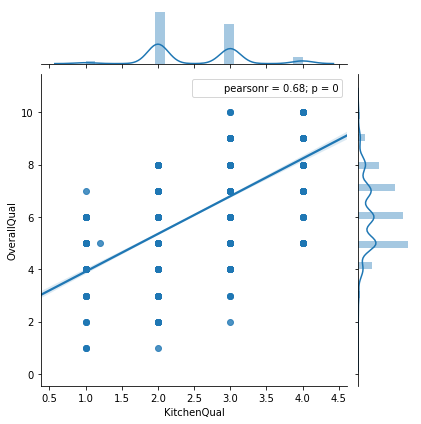

In [115]:
sns.jointplot(x = 'KitchenQual', y = 'OverallQual', data = merged_df, kind = 'reg')


In [910]:
sns.jointplot?

In [778]:
def corrfunc(x_vec, y_vec):
    x_bar = np.mean(x_vec)
    y_bar = np.mean(y_vec)
    x_sig = np.std(x_vec)
    y_sig = np.std(y_vec)
    n = len(x_vec)
    return sum(list(map(lambda x, y: (x-x_bar)*(y-y_bar), x_vec, y_vec)))\
            / (n * x_sig * y_sig)

In [105]:
value = 3 * merged_df.KitchenQual.max() / merged_df.OverallQual.max()
merged_df.KitchenQual = merged_df.KitchenQual.fillna(value)

In [114]:
merged_df.KitchenQual.unique()

array([3. , 2. , 4. , 1. , 1.2])

In [106]:
merged_df.isnull().sum().sort_values(ascending = False).head()

SalePrice     1459
MasVnrType      24
MasVnrArea      23
Fireplaces       0
ExterCond        0
dtype: int64

In [107]:
merged_df.loc[merged_df.MasVnrArea.isnull(), 'MasVnrType'] = merged_df.loc[merged_df.MasVnrArea.isnull(), 'MasVnrType'].fillna('None')
merged_df.loc[merged_df.MasVnrArea.isnull(), 'MasVnrArea'] = merged_df.loc[merged_df.MasVnrArea.isnull(), 'MasVnrArea'].fillna(0)

In [108]:
merged_df.loc[merged_df['Neighborhood'] == 'Mitchel', ['MasVnrType', 'Neighborhood', 'MasVnrArea']].groupby('MasVnrType').count()

,Neighborhood,MasVnrArea
MasVnrType,,
BrkFace,27,27
None,83,83
Stone,3,3


In [109]:
merged_df.loc[merged_df['MasVnrType'].isnull(), ['MasVnrType', 'MasVnrArea','Neighborhood']]

,MasVnrType,MasVnrArea,Neighborhood
2610,NaN,198.0,Mitchel


In [110]:
merged_df.MasVnrType = merged_df.MasVnrType.fillna('BrkFace')

In [111]:
merged_df.isnull().sum().sort_values(ascending = False).head()

SalePrice        1459
Foundation          0
EnclosedPorch       0
ExterCond           0
ExterQual           0
dtype: int64

In [856]:
merged_df.head()

,index,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0,856,854,0,None,3,1Fam,3.0,No,706.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1,1262,0,0,None,3,1Fam,3.0,Gd,978.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,2,920,866,0,None,3,1Fam,3.0,Mn,486.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,3,961,756,0,None,3,1Fam,4.0,No,216.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,4,1145,1053,0,None,4,1Fam,3.0,Av,655.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [112]:
merged_df.loc[:, merged_df.columns.str.startswith('Exter')]

,ExterCond,ExterQual,Exterior1st,Exterior2nd
0,TA,Gd,VinylSd,VinylSd
1,TA,TA,MetalSd,MetalSd
2,TA,Gd,VinylSd,VinylSd
3,TA,TA,Wd Sdng,Wd Shng
4,TA,Gd,VinylSd,VinylSd
5,TA,TA,VinylSd,VinylSd
6,TA,Gd,VinylSd,VinylSd
7,TA,TA,HdBoard,HdBoard
8,TA,TA,BrkFace,Wd Shng
9,TA,TA,MetalSd,MetalSd


In [116]:
merged_df.ExterCond = merged_df.ExterCond.map(Qualities)
merged_df.ExterQual = merged_df.ExterQual.map(Qualities)

In [117]:
merged_df.HeatingQC = merged_df.HeatingQC.map(Qualities)

In [118]:
merged_df.CentralAir = merged_df.CentralAir.map({'Y': 1, 'N': 0})

In [867]:
merged_df.PoolQC.unique()

array([0, 5, 2, 4], dtype=int64)

In [119]:
test2 = merged_df.loc[merged_df.SalePrice.isnull(), :]
train2 = merged_df.loc[merged_df.SalePrice.isnull()==False, :]

In [120]:
from sklearn import linear_model as lm

In [121]:
y0 = train2[['SalePrice']]
x0 = train2[['GrLivArea']]

In [122]:
fit0 = lm.LinearRegression()
fit0.fit(x0, y0)
#(x0, y0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
print((fit0.coef_,fit0.intercept_))
fit0.score(x0, y0)

(array([[107.13035897]]), array([18569.02585649]))


0.5021486502718042

In [138]:
x1 = train2[['GrLivArea', 'OverallCond']]
x_t1 = test2[['GrLivArea', 'OverallCond']]

In [136]:
fit0.fit(x1, y0)
fit0.score(x1,y0)

0.5026090433066157

In [139]:
y0result = fit0.predict(x_t1)

In [134]:
train2.select_dtypes(exclude = 'object').corr().SalePrice.sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.585207
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
FireplaceQu      0.520438
GarageYrBlt      0.508043
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
LotFrontage      0.347806
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
GarageCond       0.263191
CentralAir       0.251328
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
BedroomAbvGr     0.168213
PoolQC           0.111696
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
ExterCond   

In [141]:
x2 = train2[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',\
            'BsmtQual', 'FullBath', 'TotRmsAbvGrd', 'FireplaceQu']]
x_t2 = test2[['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',\
            'BsmtQual', 'FullBath', 'TotRmsAbvGrd', 'FireplaceQu']]

In [142]:
fit1 = lm.LinearRegression()
fit1.fit(x2, y0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
fit1.score(x2,y0)

0.7893513611268601

In [144]:
y1result = fit1.predict(x_t2)
y1result

array([[109544.86265147],
       [159840.58864176],
       [161321.79777929],
       ...,
       [147891.91192018],
       [101535.029114  ],
       [218561.79261241]])

In [158]:
train2.loc[:, train2.columns.str.contains('Area|SF')]

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,GarageArea,GrLivArea,LotArea,LowQualFinSF,MasVnrArea,OpenPorchSF,PoolArea,TotalBsmtSF,WoodDeckSF
0,856,854,706.0,0.0,150.0,548.0,1710,8450,0,196.0,61,0,856.0,0
1,1262,0,978.0,0.0,284.0,460.0,1262,9600,0,0.0,0,0,1262.0,298
2,920,866,486.0,0.0,434.0,608.0,1786,11250,0,162.0,42,0,920.0,0
3,961,756,216.0,0.0,540.0,642.0,1717,9550,0,0.0,35,0,756.0,0
4,1145,1053,655.0,0.0,490.0,836.0,2198,14260,0,350.0,84,0,1145.0,192
5,796,566,732.0,0.0,64.0,480.0,1362,14115,0,0.0,30,0,796.0,40
6,1694,0,1369.0,0.0,317.0,636.0,1694,10084,0,186.0,57,0,1686.0,255
7,1107,983,859.0,32.0,216.0,484.0,2090,10382,0,240.0,204,0,1107.0,235
8,1022,752,0.0,0.0,952.0,468.0,1774,6120,0,0.0,0,0,952.0,90
9,1077,0,851.0,0.0,140.0,205.0,1077,7420,0,0.0,4,0,991.0,0


In [159]:
train2.select_dtypes(exclude = 'object').corr().GrLivArea.sort_values(ascending = False)

GrLivArea        1.000000
TotRmsAbvGrd     0.825489
SalePrice        0.708624
2ndFlrSF         0.687501
FullBath         0.630012
OverallQual      0.593007
1stFlrSF         0.566024
BedroomAbvGr     0.521270
FireplaceQu      0.469947
GarageArea       0.468997
GarageCars       0.467247
Fireplaces       0.461679
TotalBsmtSF      0.454868
ExterQual        0.435986
KitchenQual      0.420563
HalfBath         0.415772
MasVnrArea       0.388052
LotFrontage      0.381769
OpenPorchSF      0.330224
BsmtQual         0.327956
YearRemodAdd     0.287389
LotArea          0.263116
HeatingQC        0.254644
WoodDeckSF       0.247433
BsmtUnfSF        0.240257
GarageYrBlt      0.235387
BsmtFinSF1       0.208171
PoolQC           0.206441
YearBuilt        0.199010
PoolArea         0.170205
GarageQual       0.166432
GarageCond       0.153327
LowQualFinSF     0.134683
ScreenPorch      0.101510
KitchenAbvGr     0.100063
CentralAir       0.093666
BsmtCond         0.083536
MSSubClass       0.074853
MoSold      

In [160]:
train2.select_dtypes(exclude = 'object').corr().OverallQual.sort_values(ascending = False)

OverallQual      1.000000
SalePrice        0.790982
ExterQual        0.726278
KitchenQual      0.673331
BsmtQual         0.629379
GarageCars       0.600671
GrLivArea        0.593007
YearBuilt        0.572323
GarageArea       0.562022
GarageYrBlt      0.555022
YearRemodAdd     0.550684
FullBath         0.550600
TotalBsmtSF      0.537808
FireplaceQu      0.490788
1stFlrSF         0.476224
HeatingQC        0.457083
TotRmsAbvGrd     0.427452
MasVnrArea       0.407252
Fireplaces       0.396765
OpenPorchSF      0.308819
BsmtUnfSF        0.308159
2ndFlrSF         0.295493
GarageQual       0.292399
GarageCond       0.286955
HalfBath         0.273458
CentralAir       0.272038
BsmtCond         0.268759
BsmtFinSF1       0.239666
WoodDeckSF       0.238923
LotFrontage      0.237163
BsmtFullBath     0.111098
LotArea          0.105806
BedroomAbvGr     0.101676
PoolQC           0.083690
MoSold           0.070815
PoolArea         0.065166
ScreenPorch      0.064886
MSSubClass       0.032628
3SsnPorch   

In [161]:
train2.select_dtypes(exclude = 'object').corr().GarageCars.sort_values(ascending = False)

GarageCars       1.000000
GarageArea       0.882475
SalePrice        0.640409
GarageYrBlt      0.619897
OverallQual      0.600671
GarageQual       0.576622
GarageCond       0.568408
YearBuilt        0.537850
ExterQual        0.526390
KitchenQual      0.509810
FullBath         0.469672
GrLivArea        0.467247
BsmtQual         0.449194
1stFlrSF         0.439317
TotalBsmtSF      0.434585
YearRemodAdd     0.420622
FireplaceQu      0.370034
TotRmsAbvGrd     0.362289
MasVnrArea       0.361945
HeatingQC        0.325347
Fireplaces       0.300789
LotFrontage      0.280437
CentralAir       0.233726
WoodDeckSF       0.226342
BsmtFinSF1       0.224054
HalfBath         0.219178
BsmtUnfSF        0.214175
OpenPorchSF      0.213569
2ndFlrSF         0.183926
LotArea          0.154871
BsmtCond         0.142644
BsmtFullBath     0.131881
BedroomAbvGr     0.086106
ScreenPorch      0.050494
MoSold           0.040522
3SsnPorch        0.035765
PoolQC           0.024058
PoolArea         0.020934
index       

In [162]:
x3 = train2[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',\
            'BsmtQual', 'FullBath', 'FireplaceQu']]
x_t3 = test2[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',\
            'BsmtQual', 'FullBath', 'FireplaceQu']]
fit3 = lm.LinearRegression()
fit3.fit(x3, y0)
fit3.score(x3, y0)

0.7720778075392297

In [165]:
train2.select_dtypes(include = 'object').columns

Index(['Alley', 'BldgType', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'Foundation', 'Functional', 'GarageFinish', 'GarageType',
       'Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType',
       'Street', 'Utilities'],
      dtype='object')

In [189]:
useless_cols = ['LandSlope', 'Alley', 'Condition2', 'Electrical', 'Functional', 'Heating', 'LandContour', 'LandSlope', 'MiscFeature',\
               'PavedDrive', 'RoofMatl', 'Street', 'Utilities']

In [202]:
train3 = pd.get_dummies(train2.loc[:, train2.columns[train2.columns.isin(useless_cols) == False]], drop_first = True)
test3 = pd.get_dummies(test2.loc[:, test2.columns[test2.columns.isin(useless_cols) == False]], drop_first = True)